# Twitter scraper

In [1]:
#imports
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [2]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(
    sntwitter.TwitterSearchScraper(
        "AAPL since:2023-01-01"# until:2020-07-31"
    ).get_items()
):
    if i > 500:
        break
    tweets_list2.append(
        [tweet.date, tweet.id, tweet.content, tweet.user.username]
    )


C:\Users\adity\AppData\Local\Temp\ipykernel_41160\2899508573.py:13: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  [tweet.date, tweet.id, tweet.content, tweet.user.username]
Tweet 1645349476394041344 contains an app icon medium key '4_1645843414779297794' on app 'iphone_app'/'1074367771', but the corresponding medium is missing; dropping
Tweet 1645349476394041344 contains an app icon medium key '4_1645843414779297794' on app 'ipad_app'/'1074367771', but the corresponding medium is missing; dropping


In [3]:
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(
    tweets_list2, columns=["Datetime", "Tweet Id", "Text", "Username"]
)
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2023-04-12 01:27:14+00:00,1645961740440461314,We also explained and highlighted how to trade...,EWFTaha
1,2023-04-12 01:26:47+00:00,1645961630533013505,Alerts before spikes and right as big news dro...,RAJURAY48184
2,2023-04-12 01:26:33+00:00,1645961568612683779,@exporiskprivate AAPL and tech is showing some...,dt_waite
3,2023-04-12 01:25:52+00:00,1645961397207986180,$AAPL $GOOG $GLD $QQQ $SPY $VFF $TLRY $KBH $LE...,RAJURAY48184
4,2023-04-12 01:25:46+00:00,1645961374546243584,We also explained the next opportunity in #ene...,EWFTaha
...,...,...,...,...
496,2023-04-11 20:09:09+00:00,1645881695357288450,Tim just cooked $aapl lol https://t.co/2HNqJhvzCN,timmypuffedit
497,2023-04-11 20:09:02+00:00,1645881666450382849,$AAPL this may seem dumb but I have to stick t...,TradesDiego
498,2023-04-11 20:07:22+00:00,1645881245761679361,"Tomorrow: $spx to 4200, $aapl to 168, $tsla to...",bnsburner
499,2023-04-11 20:07:16+00:00,1645881221690404866,MERVAL +1.25\n\n387 399 CCL\n\nYPF +0.50 MAYOR...,robertojirusta


# Sentimental Analysis

In [4]:
#more imports
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer 

In [5]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load the sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Define a function to calculate the sentiment score for each tweet
def calculate_sentiment_score(tweet):
    """
    Calculates the sentiment score for a tweet using the VADER sentiment analyzer.
    """
    sentiment_score = sia.polarity_scores(tweet)['compound']
    return sentiment_score

# Apply the sentiment analysis function to each tweet in the DataFrame
tweets_df2['sentiment_score'] = tweets_df2['Text'].apply(calculate_sentiment_score)

# Display the resulting DataFrame
(tweets_df2)

,Datetime,Tweet Id,Text,Username,sentiment_score
0,2023-04-12 01:27:14+00:00,1645961740440461314,We also explained and highlighted how to trade...,EWFTaha,0.0000
1,2023-04-12 01:26:47+00:00,1645961630533013505,Alerts before spikes and right as big news dro...,RAJURAY48184,0.1531
2,2023-04-12 01:26:33+00:00,1645961568612683779,@exporiskprivate AAPL and tech is showing some...,dt_waite,0.2960
3,2023-04-12 01:25:52+00:00,1645961397207986180,$AAPL $GOOG $GLD $QQQ $SPY $VFF $TLRY $KBH $LE...,RAJURAY48184,0.5719
4,2023-04-12 01:25:46+00:00,1645961374546243584,We also explained the next opportunity in #ene...,EWFTaha,0.4215
...,...,...,...,...,...
496,2023-04-11 20:09:09+00:00,1645881695357288450,Tim just cooked $aapl lol https://t.co/2HNqJhvzCN,timmypuffedit,0.4215
497,2023-04-11 20:09:02+00:00,1645881666450382849,$AAPL this may seem dumb but I have to stick t...,TradesDiego,-0.7845
498,2023-04-11 20:07:22+00:00,1645881245761679361,"Tomorrow: $spx to 4200, $aapl to 168, $tsla to...",bnsburner,0.0000
499,2023-04-11 20:07:16+00:00,1645881221690404866,MERVAL +1.25\n\n387 399 CCL\n\nYPF +0.50 MAYOR...,robertojirusta,0.0000


In [7]:
# Define a function to map the sentiment score to a word
def map_sentiment_score(sentiment_score):
    """
    Maps a sentiment score to a word ('positive', 'negative', or 'neutral').
    """
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

In [8]:
# Apply the sentiment mapping function to each sentiment score in the DataFrame
tweets_df2['sentiment'] = tweets_df2['sentiment_score'].apply(map_sentiment_score)

tweets_df2

,Datetime,Tweet Id,Text,Username,sentiment_score,sentiment
0,2023-04-12 01:27:14+00:00,1645961740440461314,We also explained and highlighted how to trade...,EWFTaha,0.0000,neutral
1,2023-04-12 01:26:47+00:00,1645961630533013505,Alerts before spikes and right as big news dro...,RAJURAY48184,0.1531,positive
2,2023-04-12 01:26:33+00:00,1645961568612683779,@exporiskprivate AAPL and tech is showing some...,dt_waite,0.2960,positive
3,2023-04-12 01:25:52+00:00,1645961397207986180,$AAPL $GOOG $GLD $QQQ $SPY $VFF $TLRY $KBH $LE...,RAJURAY48184,0.5719,positive
4,2023-04-12 01:25:46+00:00,1645961374546243584,We also explained the next opportunity in #ene...,EWFTaha,0.4215,positive
...,...,...,...,...,...,...
496,2023-04-11 20:09:09+00:00,1645881695357288450,Tim just cooked $aapl lol https://t.co/2HNqJhvzCN,timmypuffedit,0.4215,positive
497,2023-04-11 20:09:02+00:00,1645881666450382849,$AAPL this may seem dumb but I have to stick t...,TradesDiego,-0.7845,negative
498,2023-04-11 20:07:22+00:00,1645881245761679361,"Tomorrow: $spx to 4200, $aapl to 168, $tsla to...",bnsburner,0.0000,neutral
499,2023-04-11 20:07:16+00:00,1645881221690404866,MERVAL +1.25\n\n387 399 CCL\n\nYPF +0.50 MAYOR...,robertojirusta,0.0000,neutral


In [9]:
tweets_df2.head(100)

,Datetime,Tweet Id,Text,Username,sentiment_score,sentiment
0,2023-04-12 01:27:14+00:00,1645961740440461314,We also explained and highlighted how to trade...,EWFTaha,0.0000,neutral
1,2023-04-12 01:26:47+00:00,1645961630533013505,Alerts before spikes and right as big news dro...,RAJURAY48184,0.1531,positive
2,2023-04-12 01:26:33+00:00,1645961568612683779,@exporiskprivate AAPL and tech is showing some...,dt_waite,0.2960,positive
3,2023-04-12 01:25:52+00:00,1645961397207986180,$AAPL $GOOG $GLD $QQQ $SPY $VFF $TLRY $KBH $LE...,RAJURAY48184,0.5719,positive
4,2023-04-12 01:25:46+00:00,1645961374546243584,We also explained the next opportunity in #ene...,EWFTaha,0.4215,positive
...,...,...,...,...,...,...
95,2023-04-12 00:34:13+00:00,1645948399101804547,Alerts given\nTrading Chat on Discord!👇\n\nhtt...,RAJURAY48184,0.8052,positive
96,2023-04-12 00:32:58+00:00,1645948086605295616,Entries &amp; exits! \nFree Chatroom link belo...,RAJURAY48184,0.5562,positive
97,2023-04-12 00:32:38+00:00,1645948002442395649,"learn trading, get alerts, ideas, updates, ana...",RAJURAY48184,0.0000,neutral
98,2023-04-12 00:32:27+00:00,1645947954119966721,@BrianBurnbomb @arny_trezzi @jimcramer I under...,Brucebb2018,0.0258,positive


In [10]:
#plot import
import matplotlib.pyplot as plt

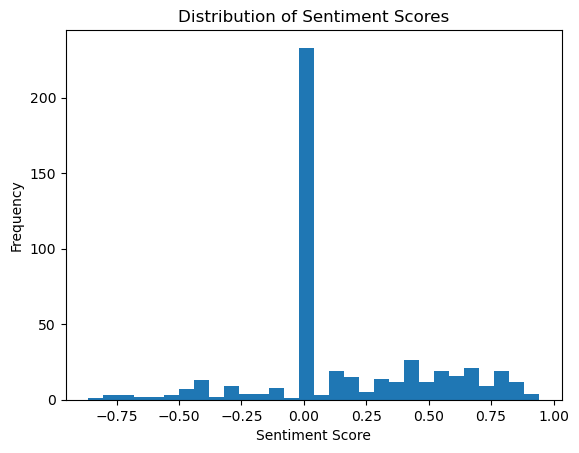

In [11]:
# Plot a histogram of the sentiment scores
plt.hist(tweets_df2['sentiment_score'], bins=30)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## Work to be done
- need cleaning of twitter data
    - remove unnecessary symbols 
- we need to make the model more accurate
    - remove as many neutrals 
    - train it to be more accurate in terms of 'stocks'
- integrate with stock data (other model)
- add support for scrapping any stock symbol dynamically with user input
- create way to display and merge both.